In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
def analytic_sol(x, y):
    return np.exp(-x - y) * np.cos(x) * np.cos(y)


def phi1(x, y):
    return np.exp(-y) * np.cos(y)


def phi2(x, y):
    return 0


def phi3(x, y):
    return np.exp(-x) * np.cos(x)


def phi4(x, y):
    return 0


def norm(cur_u, prev_u):
    max = 0

    for i in range(cur_u.shape[0]):
        for j in range(cur_u.shape[1]):
            if abs(cur_u[i, j] - prev_u[i, j]) > max:
                max = abs(cur_u[i, j] - prev_u[i, j])

    return max

In [17]:
MAX_ITERATIONS = 1000

In [18]:
def simple_iterations(x, y, h, eps):
    N = len(x)
    count = 0
    prev_u = np.zeros((N, N))
    cur_u = np.zeros((N, N))

    for j in range(len(y)):
        coeff = (phi2(x[j], y[j]) - phi1(x[j], y[j])) / (len(x) - 1)
        addition = phi1(x[j], y[j])
        for i in range(len(x)):
            cur_u[i][j] = coeff * i + addition
    for i in range(1, N - 1):
        cur_u[i, 0] = phi3(x[i], y[i])
        cur_u[i, -1] = phi4(x[i], y[i])

    while norm(cur_u, prev_u) > eps:
        count += 1
        if count > MAX_ITERATIONS:
            raise StopIteration()
        prev_u = np.copy(cur_u)
        for i in range(1, N - 1):
            for j in range(1, N - 1):
                num = -(
                    (1/h**2) * (prev_u[i + 1,j] + prev_u[i - 1,j]) +
                    (1/h**2) * (prev_u[i,j + 1] + prev_u[i,j - 1]) +
                    (1/(2*h) * 2 * (prev_u[i+1,j] - prev_u[i-1,j])) +
                    (1/(2*h) * 2 * (prev_u[i,j+1] - prev_u[i,j-1]))
                )
                div = 4 - 2 / h**2 - 2 / h**2
                cur_u[i,j] = num/div
    U = np.copy(cur_u)

    return U, count


In [19]:
eps = 0.0001
N = 50

h = (np.pi / 2 - 0) / N
x = np.arange(0, np.pi / 2 + h / 2 - 1e-4, h)
y = np.arange(0, np.pi / 2 + h / 2 - 1e-4, h)

In [20]:
U, count = simple_iterations(x,y,h,eps)
X, Y = np.meshgrid(x, y)
U_analytic = analytic_sol(X, Y)

print(f"Количество  итераций: {count}")

Количество  итераций: 393


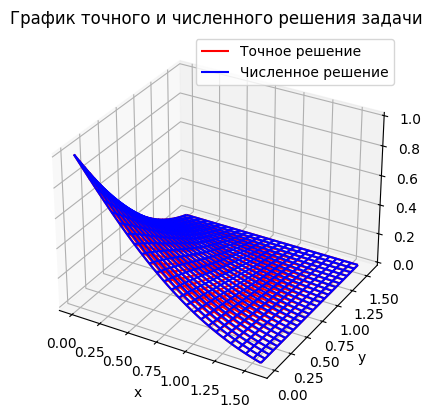

In [21]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_title("График точного и численного решения задачи")
ax.plot_wireframe(X, Y, U_analytic, color="red", label="Точное решение")
ax.plot_wireframe(X, Y, U, color="blue", label="Численное решение")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("U")
ax.legend()
plt.show()

Кол-во итераций: 393


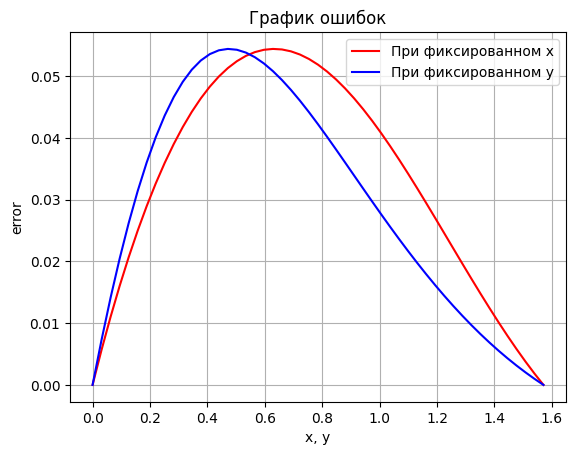

In [22]:
fig = plt.figure()

error_x = []
error_y = []
for i in range(len(x)):
    error_x.append(max(abs(U_analytic[:, i] - U[:, i])))
    error_y.append(max(abs(U_analytic[i, :] - U[i, :])))
print(f"Кол-во итераций: {count}")
plt.title("График ошибок")
plt.plot(x, error_y, label="При фиксированном x", color="red")
plt.plot(x, error_x, label="При фиксированном y", color="blue")
plt.xlabel("x, y")
plt.ylabel("error")
plt.grid()
plt.legend()
plt.show()


In [23]:
def zeidel(x, y, h, eps):
    N = len(x)
    count = 0
    prev_u = np.zeros((N, N))
    cur_u = np.zeros((N, N))
    for j in range(len(y)):
        coeff = (phi2(x[j], y[j]) - phi1(x[j], y[j])) / (len(x) - 1)
        addition = phi1(x[j], y[j])
        for i in range(len(x)):
            cur_u[i][j] = coeff * i + addition
    for i in range(1, N - 1):
        cur_u[i, 0] = phi3(x[i], y[i])
        cur_u[i, -1] = phi4(x[i], y[i])

    while norm(cur_u, prev_u) > eps:
        count += 1
        if count > MAX_ITERATIONS:
            raise StopIteration()
        prev_u = np.copy(cur_u)

        for i in range(1, N - 1):
            for j in range(1, N - 1):
                num = -(
                    (1/h**2) * (prev_u[i + 1,j] + cur_u[i - 1,j]) +
                    (1/h**2) * (prev_u[i,j + 1] + cur_u[i,j - 1]) +
                    (1/(2*h) * 2 * (prev_u[i+1,j] - cur_u[i-1,j])) +
                    (1/(2*h) * 2 * (prev_u[i,j+1] - cur_u[i,j-1]))
                )
                div = 4 - 2 / h**2 - 2 / h**2
                cur_u[i,j] = num/div
    U = np.copy(cur_u)

    return U, count

Кол-во итераций: 364


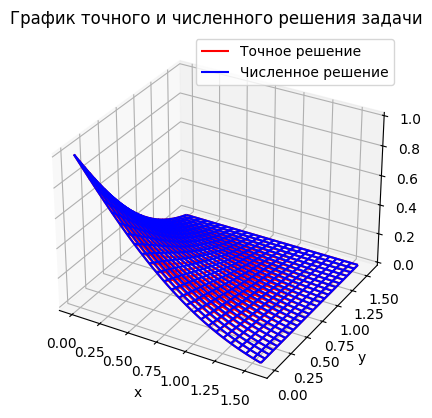

In [24]:
U, count = zeidel(x,y,h,eps)
X, Y = np.meshgrid(x, y)
U_analytic = analytic_sol(X, Y)
print(f"Кол-во итераций: {count}")

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_title("График точного и численного решения задачи")
ax.plot_wireframe(X, Y, U_analytic, color="red", label="Точное решение")
ax.plot_wireframe(X, Y, U, color="blue", label="Численное решение")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("U")
ax.legend()
plt.show()

Кол-во итераций: 364


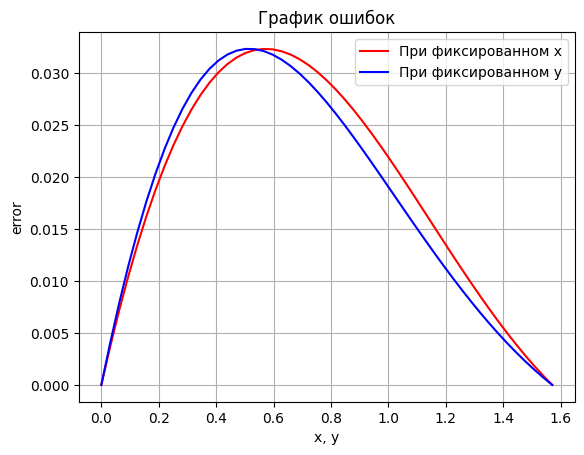

In [25]:
fig = plt.figure()

error_x = []
error_y = []
for i in range(len(x)):
    error_x.append(max(abs(U_analytic[:, i] - U[:, i])))
    error_y.append(max(abs(U_analytic[i, :] - U[i, :])))
print(f"Кол-во итераций: {count}")
plt.title("График ошибок")
plt.plot(x, error_y, label="При фиксированном x", color="red")
plt.plot(x, error_x, label="При фиксированном y", color="blue")
plt.xlabel("x, y")
plt.ylabel("error")
plt.grid()
plt.legend()
plt.show()

In [26]:
def relax(x, y, h, eps, theta):
    N = len(x)
    count = 0
    prev_u = np.zeros((N, N))
    cur_u = np.zeros((N, N))
    for j in range(len(y)):
        coeff = (phi2(x[j], y[j]) - phi1(x[j], y[j])) / (len(x) - 1)
        addition = phi1(x[j], y[j])
        for i in range(len(x)):
            cur_u[i][j] = coeff * i + addition
    for i in range(1, N - 1):
        cur_u[i, 0] = phi3(x[i], y[i])
        cur_u[i, -1] = phi4(x[i], y[i])

    while norm(cur_u, prev_u) > eps:
        count += 1
        if count > MAX_ITERATIONS:
            raise StopIteration()
        prev_u = np.copy(cur_u)
        for i in range(1, N - 1):
            for j in range(1, N - 1):
                num = -(
                    (1/h**2) * (prev_u[i + 1,j] + cur_u[i - 1,j]) +
                    (1/h**2) * (prev_u[i,j + 1] + cur_u[i,j - 1]) +
                    (1/(2*h) * 2 * (prev_u[i+1,j] - cur_u[i-1,j])) +
                    (1/(2*h) * 2 * (prev_u[i,j+1] - cur_u[i,j-1]))
                )
                div = 4 - 2 / h**2 - 2 / h**2
                cur_u[i,j] = theta * num/div + (1-theta) * prev_u[i,j]

    U = np.copy(cur_u)

    return U, count

Кол-во итераций: 101


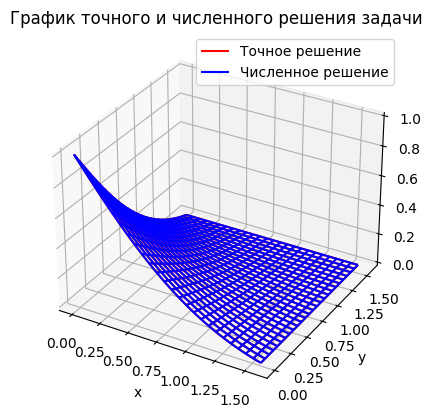

In [27]:
theta = 1.85

U, count = relax(x,y,h,eps,theta)
X, Y = np.meshgrid(x, y)
U_analytic = analytic_sol(X, Y)
print(f"Кол-во итераций: {count}")

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_title("График точного и численного решения задачи")
ax.plot_wireframe(X, Y, U_analytic, color="red", label="Точное решение")
ax.plot_wireframe(X, Y, U, color="blue", label="Численное решение")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("U")
ax.legend()
plt.show()

Кол-во итераций: 101


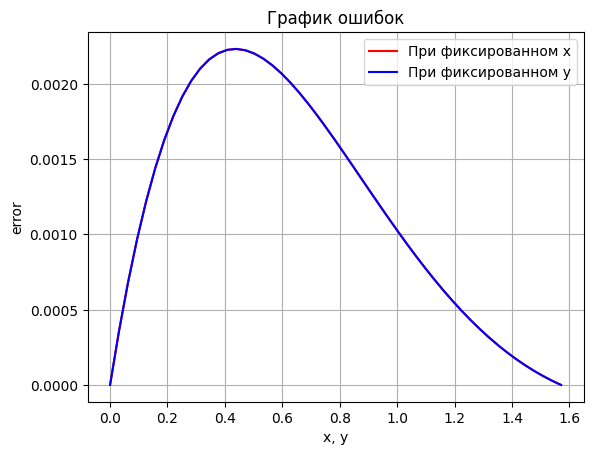

In [28]:
fig = plt.figure()

error_x = []
error_y = []
for i in range(len(x)):
    error_x.append(max(abs(U_analytic[:, i] - U[:, i])))
    error_y.append(max(abs(U_analytic[i, :] - U[i, :])))
print(f"Кол-во итераций: {count}")
plt.title("График ошибок")
plt.plot(x, error_y, label="При фиксированном x", color="red")
plt.plot(x, error_x, label="При фиксированном y", color="blue")
plt.xlabel("x, y")
plt.ylabel("error")
plt.grid()
plt.legend()
plt.show()